In [1]:
import pickle
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [15]:
def cv_show(img, winname='sample'):
    cv2.imshow(winname, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [16]:
img = cv2.imread(r"D:\Users\Downloads\BlobTest.webp")
cv_show(img)

In [17]:
# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector()
 
# Detect blobs.
keypoints = detector.detect(img)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(img, keypoints, 
    np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Show keypoints
cv2.imshow("Keypoints", im_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: Unknown C++ exception from OpenCV code

In [2]:
with open('colored_mask.pkl', 'rb') as f:
    colored_mask = pickle.load(f)
with open('class_colors.pkl', 'rb') as f:
    class_colors = pickle.load(f)
with open('class_names.pkl', 'rb') as f:
    class_names = pickle.load(f)
with open('image.pkl', 'rb') as f:
    image = pickle.load(f)

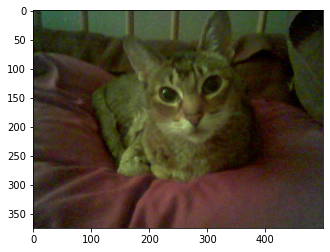

In [3]:
plt.imshow(image);

In [4]:
class_colors

array([[  0,   0,   0],
       [ 76, 129,  81],
       [246, 198, 162]], dtype=uint8)

In [5]:
colored_mask

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

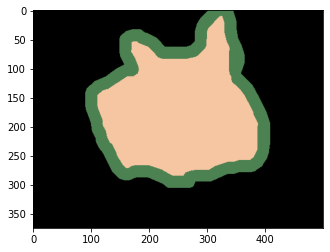

In [6]:
plt.imshow(colored_mask);
# cv2.imshow('colored_mask', colored_mask)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [7]:
class_colors

array([[  0,   0,   0],
       [ 76, 129,  81],
       [246, 198, 162]], dtype=uint8)

In [13]:
# class_name2first_coord = {}
class_name2color = {}
# draw_class_colors = []
# draw_class_names = []
first_coords = []
for i, color in enumerate(class_colors):
    print(color)
    if np.all(color == [0,0,0]):
        continue
    indices = np.where(np.all(colored_mask == color, axis=-1))
    first_coord = next(zip(indices[0], indices[1]))
    class_name2color[class_names[i]] = tuple(color.tolist())
    # draw_class_names.append(class_names[i])
    first_coords.append(first_coord)
    # draw_class_colors.append(color)
    # class_name2first_coord[class_names[i]] = first_coord
# draw_class_names, first_coords
class_name2color

[0 0 0]
[ 76 129  81]
[246 198 162]


{'border': (76, 129, 81), 'main': (246, 198, 162)}

In [14]:
indices

(array([ 10,  10,  10, ..., 284, 284, 284], dtype=int64),
 array([323, 324, 325, ..., 257, 258, 259], dtype=int64))

In [12]:
class_names, class_colors, colored_mask.shape

(['background', 'border', 'main'],
 array([[  0,   0,   0],
        [ 76, 129,  81],
        [246, 198, 162]], dtype=uint8),
 (375, 500, 3))

In [6]:
first_coords

[(0, 302), (10, 323)]

In [8]:
# from pathlib import Path
# import sys

# SRC = Path('src')  # ROOT folder -> ./src
# LIB_PATH = SRC / "lib"
# if str(LIB_PATH) not in sys.path:
#     sys.path.insert(0, str(LIB_PATH))  # ./lib
# from src.lib.machine_learning.visuals import draw_gt_bboxes, draw_segmentation_classes, get_colored_mask_image

[INFO] Logging console outputs to C:\Users\roxas\vision_system_logs\logs_2022-12-15_00-34-01_898736.txt


In [9]:
alpha = 0.5
output = cv2.addWeighted(colored_mask, alpha, image, 1 - alpha, 0)
print(output.shape)
cv2.imshow('output', cv2.cvtColor(output, cv2.COLOR_RGB2BGR))
cv2.waitKey(0)
cv2.destroyAllWindows()

(375, 500, 3)


In [24]:
from typing import Any, Dict, List, NamedTuple, Optional, Sequence, Set, Tuple, Union

def draw_segmentation_classes(
    image_np: np.ndarray,
    first_coords: Sequence[Tuple[int, int, int]],
    class_colors: Dict[str, Tuple[int, int, int]],
    alpha: int = 0.5, copy_image: bool = True
) -> np.ndarray:
    """Draw bounding boxes on the image and return the drawn image as a copy.

    Args:
        image_np (np.ndarray): the image to be drawn
        first_coords (Sequence[Tuple[int, int, int, int]]): First coordinates of
            each of the classes
        color (Tuple[int, int, int], optional): color to use for the bounding boxes in
            this image. Defaults to (0, 150, 0).
        class_colors (Dict[str, Tuple[int, int, int]], optional): Can be created with the
            `create_class_colors` function. If this is passed in,
            these colors are used instead of the `color` passed in. Defaults to None.

    Returns:
        np.ndarray: the image drawn with bounding boxes
    """
    # logger.debug(f"Total annotations for the image: {len(first_coords)}")
    print(f"Total annotations for the image: {len(first_coords)}")
    class_names = list(class_colors.keys())

    out = image_np.copy()

    for (y, x), class_name in zip(first_coords, class_names):
        if isinstance(x, float):
            x, y = int(x), int(y)
        color = class_colors[class_name]

        y = y - 36 if y - 36 > 0 else y
        ((label_width, label_height), _) = cv2.getTextSize(
            class_name, fontFace=cv2.FONT_HERSHEY_PLAIN, fontScale=1.75, thickness=2
        )

        overlay = np.zeros_like(image_np, np.uint8)

        cv2.rectangle(
            overlay,
            (x - 1, y),
            (
                int(x + label_width * 1.02),
                int(y + label_height + label_height * 1),
            ),
            color=(255, 255, 255),
            thickness=cv2.FILLED,
        )

        cv2.putText(
            overlay,
            class_name,
            (
                int(x + label_width * 0.02),
                int(y + label_height + label_height * 0.5),
            ),  # bottom left
            fontFace=cv2.FONT_HERSHEY_PLAIN,
            fontScale=1.75,
            color=color,
            thickness=2,
        )
        mask = overlay.astype(bool)
        out[mask] = cv2.addWeighted(out, alpha, overlay, 1 - alpha, 0)[mask]
    return out

In [25]:
out = draw_segmentation_classes(output, first_coords, class_name2color)
out.shape

Total annotations for the image: 2


(375, 500, 3)

In [26]:
cv2.imshow('out', cv2.cvtColor(out, cv2.COLOR_RGB2BGR))
cv2.waitKey(0)
cv2.destroyAllWindows()

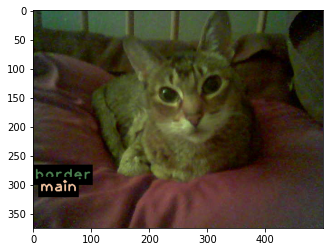

In [10]:
plt.imshow(out);